In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Documents/repos/juDataNSOM`


In [2]:
using DataAnNSOM, LinearAlgebra,Interpolations,LaTeXStrings,Plots; pyplot()


┌ Info: Precompiling DataAnNSOM [2b288ba5-5bae-46b0-a503-45a1fdc6ef2f]
└ @ Base loading.jl:1664


Plots.PyPlotBackend()

In [54]:
mo,dy = 10,14; fi=2
nEl = 5
data,datAmp,datFase = DataAnNSOM.read_FileData(mo,dy,fi);
size(data)

(3, 2, 45)

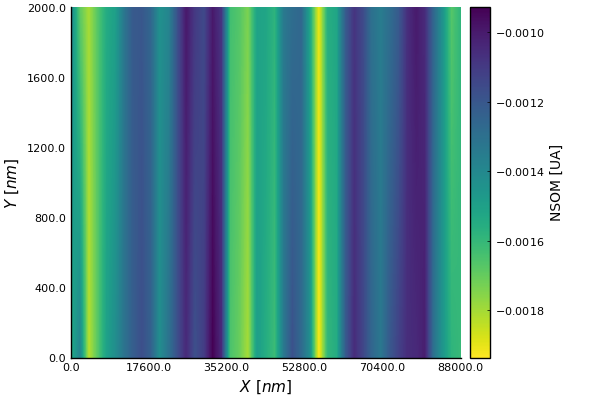

In [55]:

datIm = data[2,:,:]
labelT = "NSOM [UA]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
#plot(p1,p2, size=(1200,400) )
p1

In [56]:
imArr = datIm
dataA,dataF = datAmp,datFase

DatArrA = DataAnNSOM.GetArrdat(imArr,dataA); DatArrF = DataAnNSOM.GetArrdat(imArr,dataF);

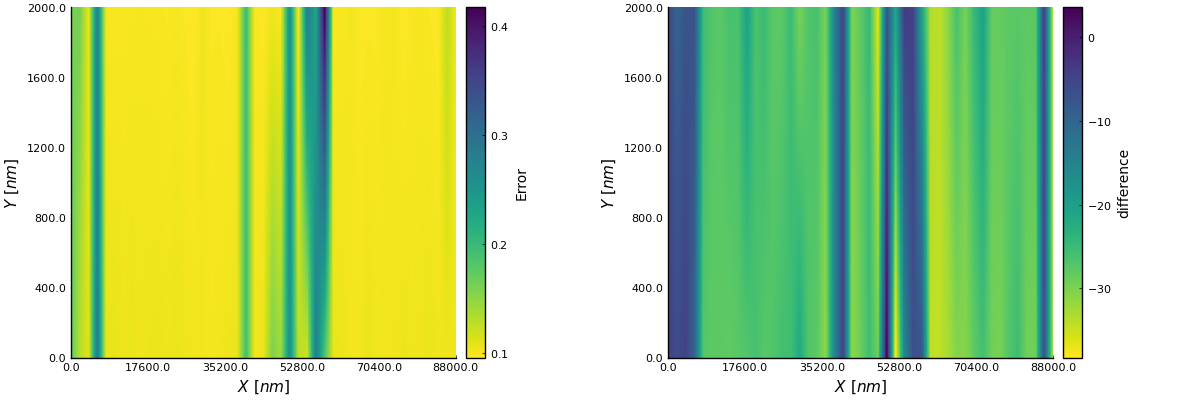

In [57]:
imErr = DataAnNSOM.getErrArr(DatArrA,imArr); imDif = DataAnNSOM.GetDifAmp(DatArrF,imArr);

pE = DataAnNSOM.plotImag(mo,dy,imErr, "Error",5,fi); pD = DataAnNSOM.plotImag(mo,dy,imDif, "difference",5,fi) 
plot(pE,pD, size=(1200,400))

# ===============================================

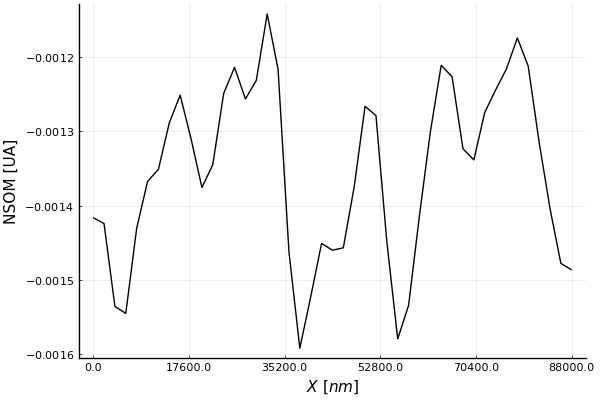

In [59]:
nct = 15
datFiltr = DataAnNSOM.getFiltImag1(datIm,nct)

DataAnNSOM.plotProfile(mo,dy,datFiltr, labelT,5,1,fi)

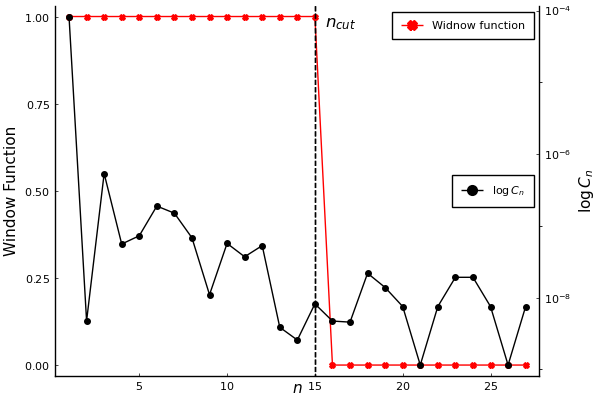

In [60]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,nct)
DataAnNSOM.PlotFilter(PSD,indices,nct)

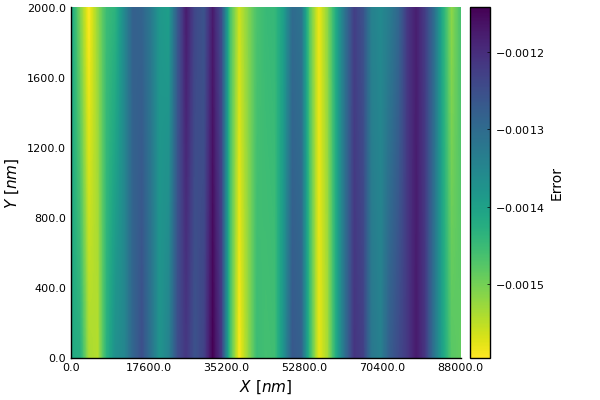

In [61]:
DataAnNSOM.plotImag(mo,dy,datFiltr, "Error",5,fi)